In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

changing into datetime and separting hour ,minute

In [7]:
df['Dep_Hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_Minute'] = pd.to_datetime(df.Dep_Time).dt.minute

In [8]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [9]:
df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_hr,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,24,3,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50,1,5,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5,12,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50,1,3,21,35


In [11]:
#dropping unimportant column
df.drop(["Duration","Date_of_Journey"],axis=1,inplace=True)

In [12]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,22,20,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,5,50,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,25,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,18,5,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,16,50,1,3,21,35


In [13]:
#filling 1 null value
df['Route'].fillna("DEL → BOM → COK",inplace=True)

In [14]:
df['Route'].value_counts()

DEL → BOM → COK                2377
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JDH → JAI → DEL → HYD       1
BOM → JLR → HYD                   1
CCU → IXZ → MAA → BLR             1
BOM → CCU → HYD                   1
CCU → VTZ → BLR                   1
Name: Route, Length: 128, dtype: int64

In [15]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [16]:
df['Total_Stops'].fillna("1 stop",inplace=True)

In [17]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Total_Stops        0
Additional_Info    0
Price              0
Dep_Hour           0
Dep_Minute         0
Journey_Day        0
Journey_Month      0
Arrival_hr         0
Arrival_min        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Total_Stops      10683 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Dep_Hour         10683 non-null  int64 
 10  Dep_Minute       10683 non-null  int64 
 11  Journey_Day      10683 non-null  int64 
 12  Journey_Month    10683 non-null  int64 
 13  Arrival_hr       10683 non-null  int64 
 14  Arrival_min      10683 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.2+ MB


changing object dtype into int 

In [20]:
df['Journey_Day'] = df['Journey_Day'].astype(int)
df['Journey_Month'] = df['Journey_Month'].astype(int)

df['Arrival_min'] = df['Arrival_min'].astype(int)
df['Arrival_hr'] = df['Arrival_hr'].astype(int)
df['Dep_Minute'] = df['Dep_Minute'].astype(int)
df['Dep_Hour'] = df['Dep_Hour'].astype(int)

In [21]:
df.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10683 non-null  object
 4   Total_Stops      10683 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Dep_Hour         10683 non-null  int32 
 8   Dep_Minute       10683 non-null  int32 
 9   Journey_Day      10683 non-null  int32 
 10  Journey_Month    10683 non-null  int32 
 11  Arrival_hr       10683 non-null  int32 
 12  Arrival_min      10683 non-null  int32 
dtypes: int32(6), int64(1), object(6)
memory usage: 834.7+ KB


In [23]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,1,3,21,35


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

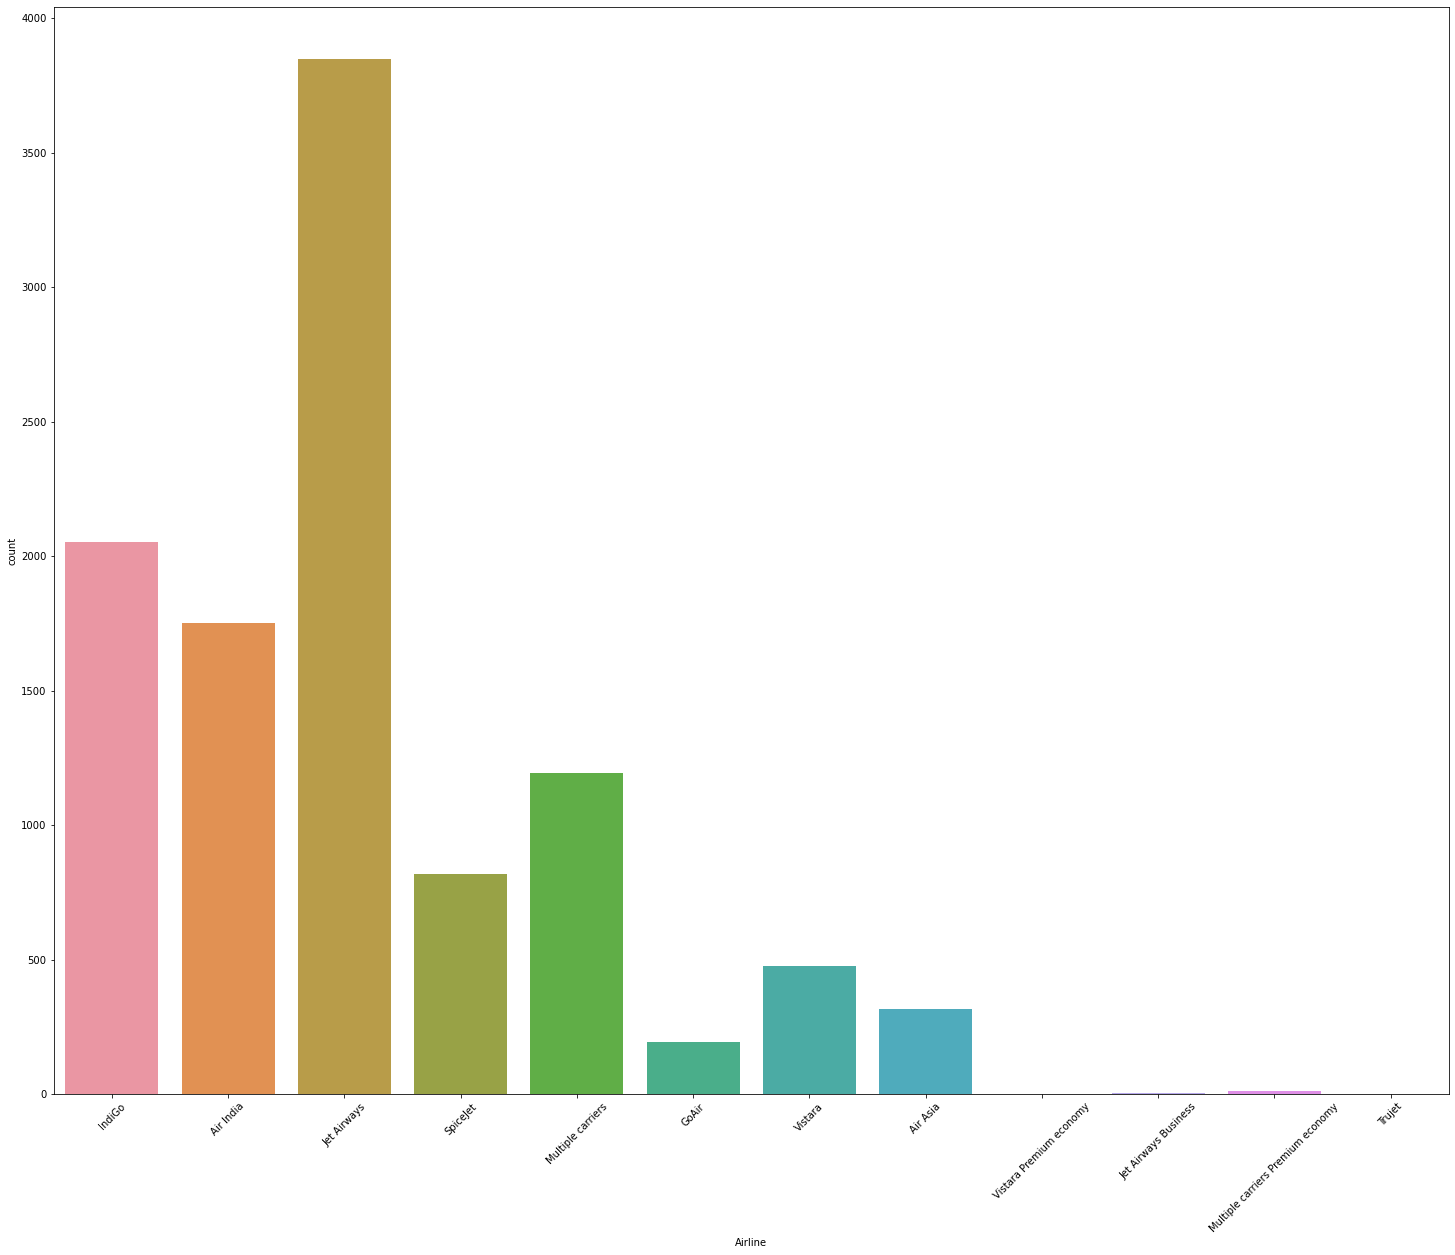

In [25]:
plt.figure(figsize=[25,20])
sns.countplot(x='Airline',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

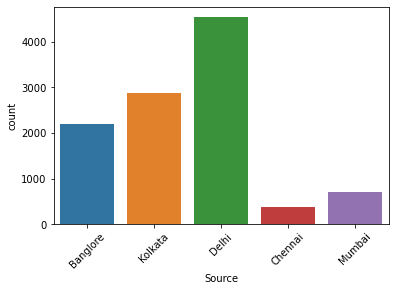

In [26]:

sns.countplot(x='Source',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

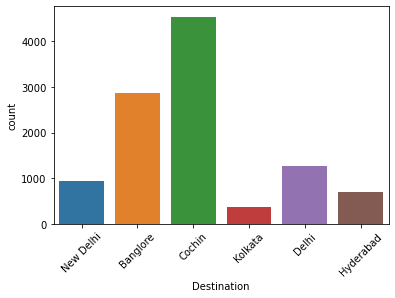

In [27]:
sns.countplot(x='Destination',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

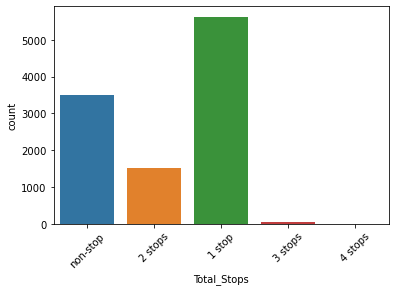

In [28]:

sns.countplot(x='Total_Stops',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

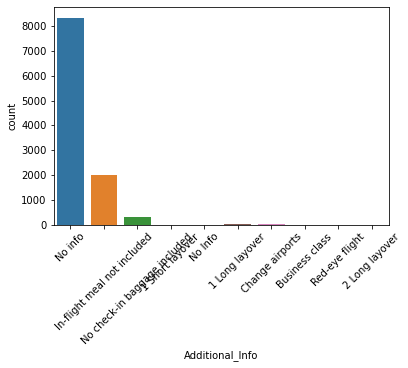

In [29]:
sns.countplot(x='Additional_Info',data=df)
plt.xticks(rotation=45)

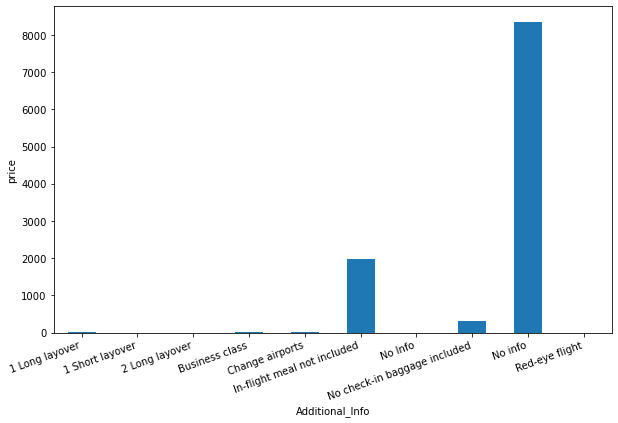

In [30]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('Additional_Info').Price.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('price')
plt.show()

In [31]:
#converting categorical data into numerical value
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [32]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

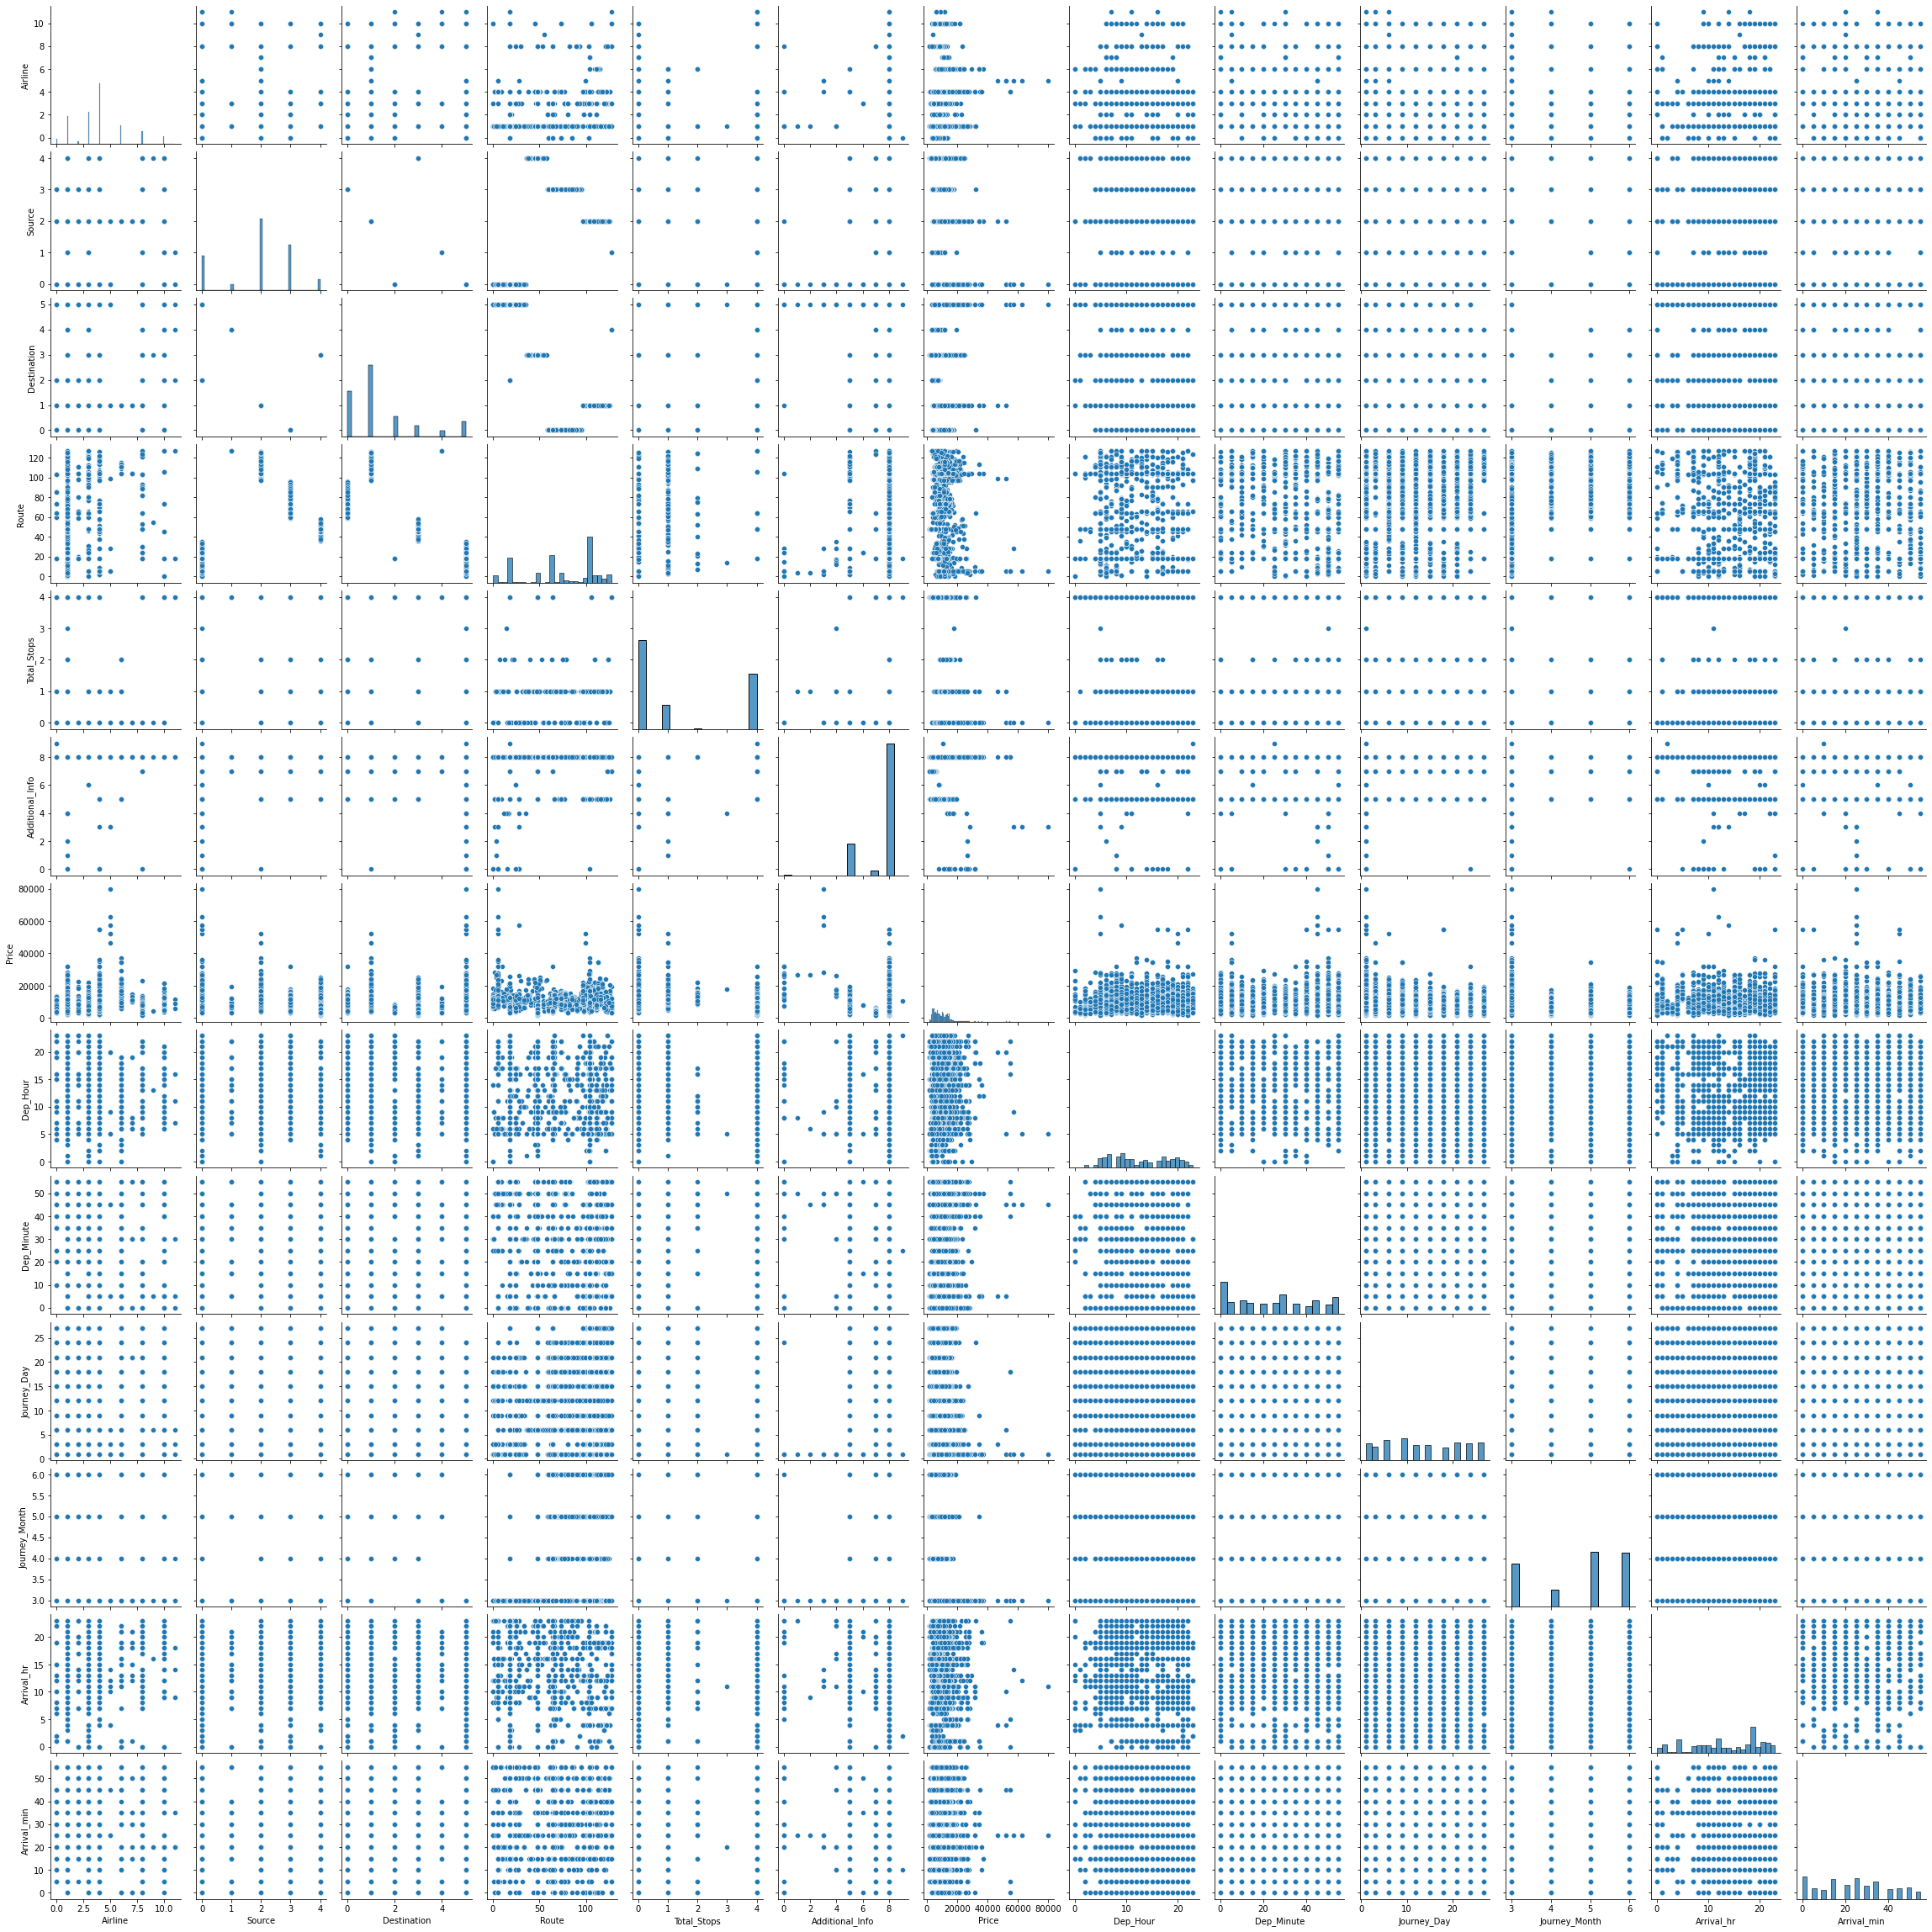

In [33]:
sns.pairplot(df)

Source


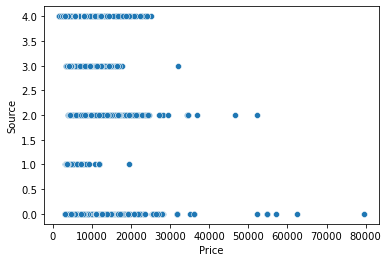

Destination


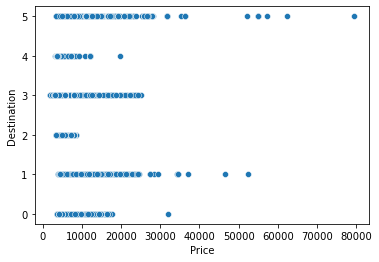

Route


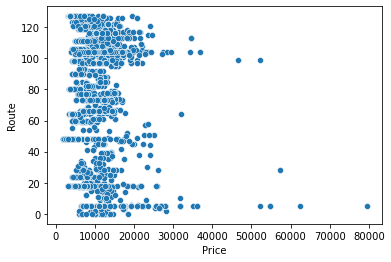

Total_Stops


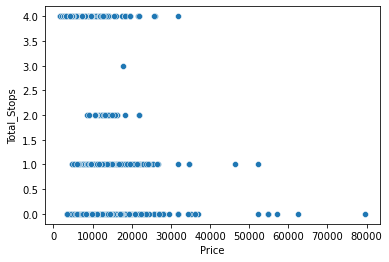

Additional_Info


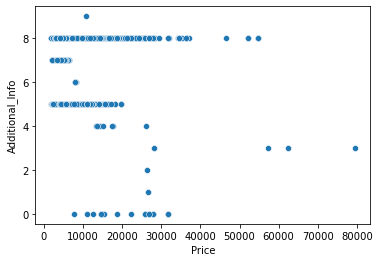

Price


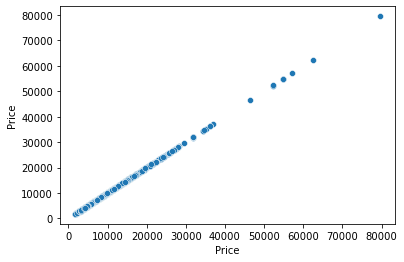

Dep_Hour


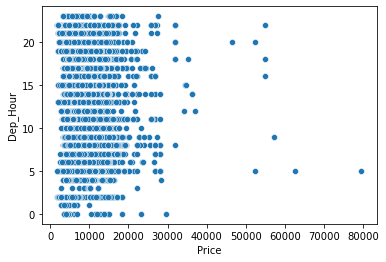

Dep_Minute


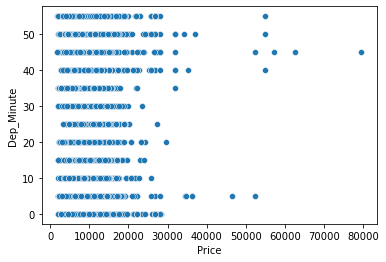

Journey_Day


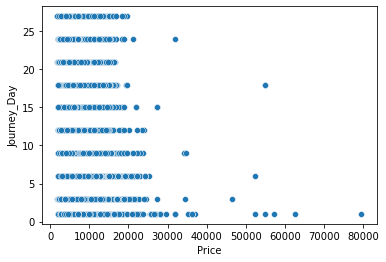

Journey_Month


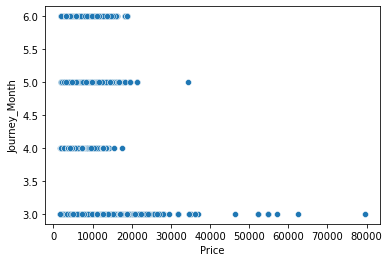

Arrival_hr


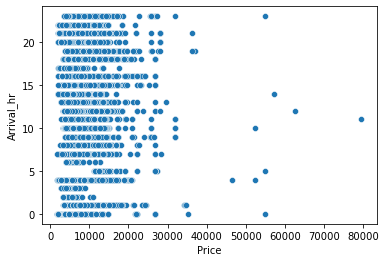

Arrival_min


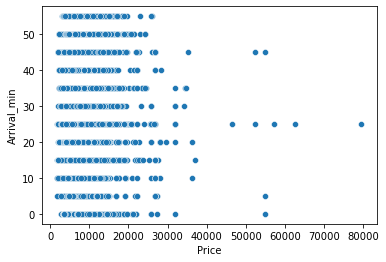

In [34]:
col=df.columns
col
for i in col[1:]:
    print(i)
    plt.figure()
    sns.scatterplot(data=df,x='Price',y=i)
    plt.show()

<AxesSubplot:>

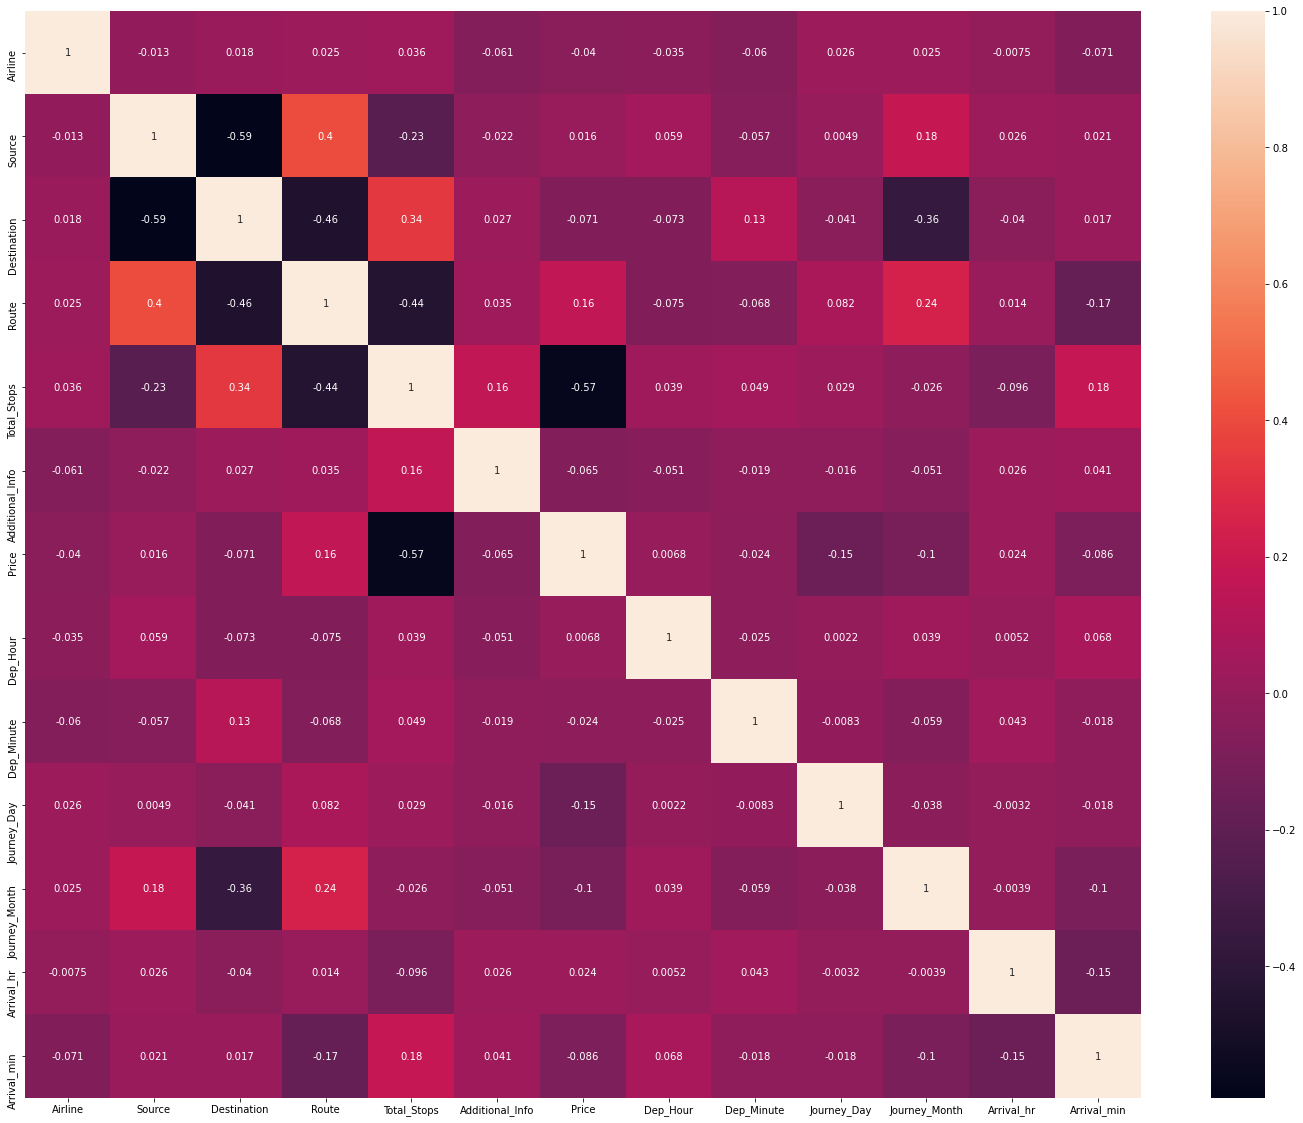

In [35]:
#checking correlation
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(),annot=True)

In [36]:
df.corr()["Price"].sort_values(ascending=False)

Price              1.000000
Route              0.164118
Arrival_hr         0.024264
Source             0.015998
Dep_Hour           0.006819
Dep_Minute        -0.024492
Airline           -0.039520
Additional_Info   -0.065478
Destination       -0.071112
Arrival_min       -0.086155
Journey_Month     -0.103651
Journey_Day       -0.153738
Total_Stops       -0.571174
Name: Price, dtype: float64

In [ ]:
#As we see route is positively correlated and total_stops is negatively correlated

Airline               AxesSubplot(0.125,0.749828;0.133621x0.130172)
Source             AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Destination         AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Route              AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Total_Stops        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Additional_Info       AxesSubplot(0.125,0.593621;0.133621x0.130172)
Price              AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Dep_Hour            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Dep_Minute         AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Journey_Day        AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Journey_Month         AxesSubplot(0.125,0.437414;0.133621x0.130172)
Arrival_hr         AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Arrival_min         AxesSubplot(0.44569,0.437414;0.133621x0.130172)
dtype: object

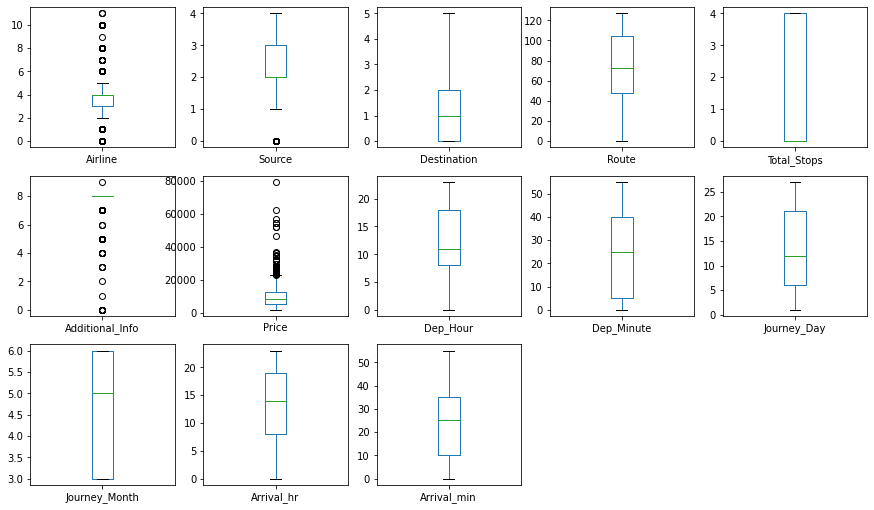

In [38]:
#checking outlier
df.plot(kind='box', figsize=(15,15), layout=(5,5), sharex=False, subplots=True)

In [39]:
#checking skewness
df.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Route             -0.502066
Total_Stops        0.631681
Additional_Info   -1.779838
Price              1.812552
Dep_Hour           0.113073
Dep_Minute         0.167029
Journey_Day        0.118351
Journey_Month     -0.387493
Arrival_hr        -0.369988
Arrival_min        0.110945
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

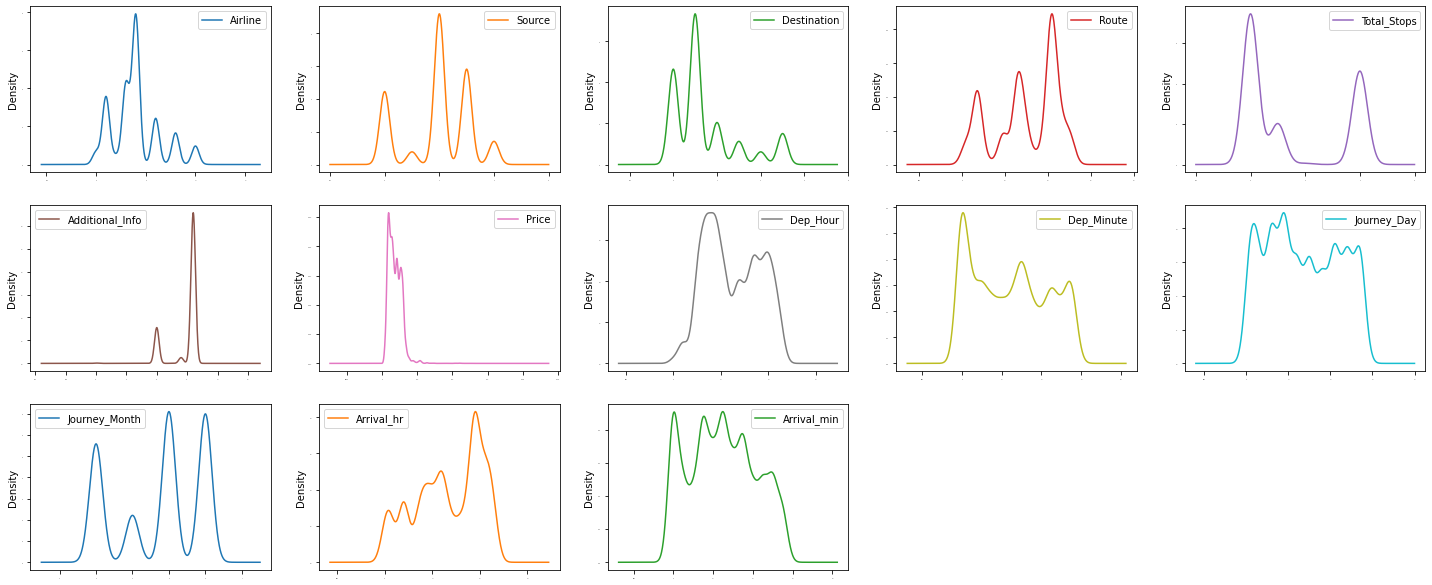

In [40]:
#checking distribution graph
df.plot(kind="density",subplots=True,layout=(7,5),sharex=False,fontsize=1,figsize=(25,25))
plt.show

# test data

In [41]:
df_test=pd.read_excel("test_set.xlsx")

In [42]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [44]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [46]:
df_test['Dep_Hour'] = pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['Dep_Minute'] = pd.to_datetime(df_test.Dep_Time).dt.minute
df_test['Journey_Day'] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test['Journey_Month'] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.month
df_test['Arrival_hr'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute



In [47]:
df_test.drop(["Duration","Date_of_Journey"],axis=1,inplace=True)
df_test.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [48]:
df['Journey_Day'] = df['Journey_Day'].astype(int)
df['Journey_Month'] = df['Journey_Month'].astype(int)

df['Arrival_min'] = df['Arrival_min'].astype(int)
df['Arrival_hr'] = df['Arrival_hr'].astype(int)
df['Dep_Minute'] = df['Dep_Minute'].astype(int)
df['Dep_Hour'] = df['Dep_Hour'].astype(int)

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Total_Stops      2671 non-null   object
 5   Additional_Info  2671 non-null   object
 6   Dep_Hour         2671 non-null   int64 
 7   Dep_Minute       2671 non-null   int64 
 8   Journey_Day      2671 non-null   int64 
 9   Journey_Month    2671 non-null   int64 
 10  Arrival_hr       2671 non-null   int64 
 11  Arrival_min      2671 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 250.5+ KB


In [50]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [51]:
for i in df_test.columns:
    if df_test[i].dtypes=="object":
        df_test[i]=enc.fit_transform(df_test[i].values.reshape(-1,1))

<AxesSubplot:>

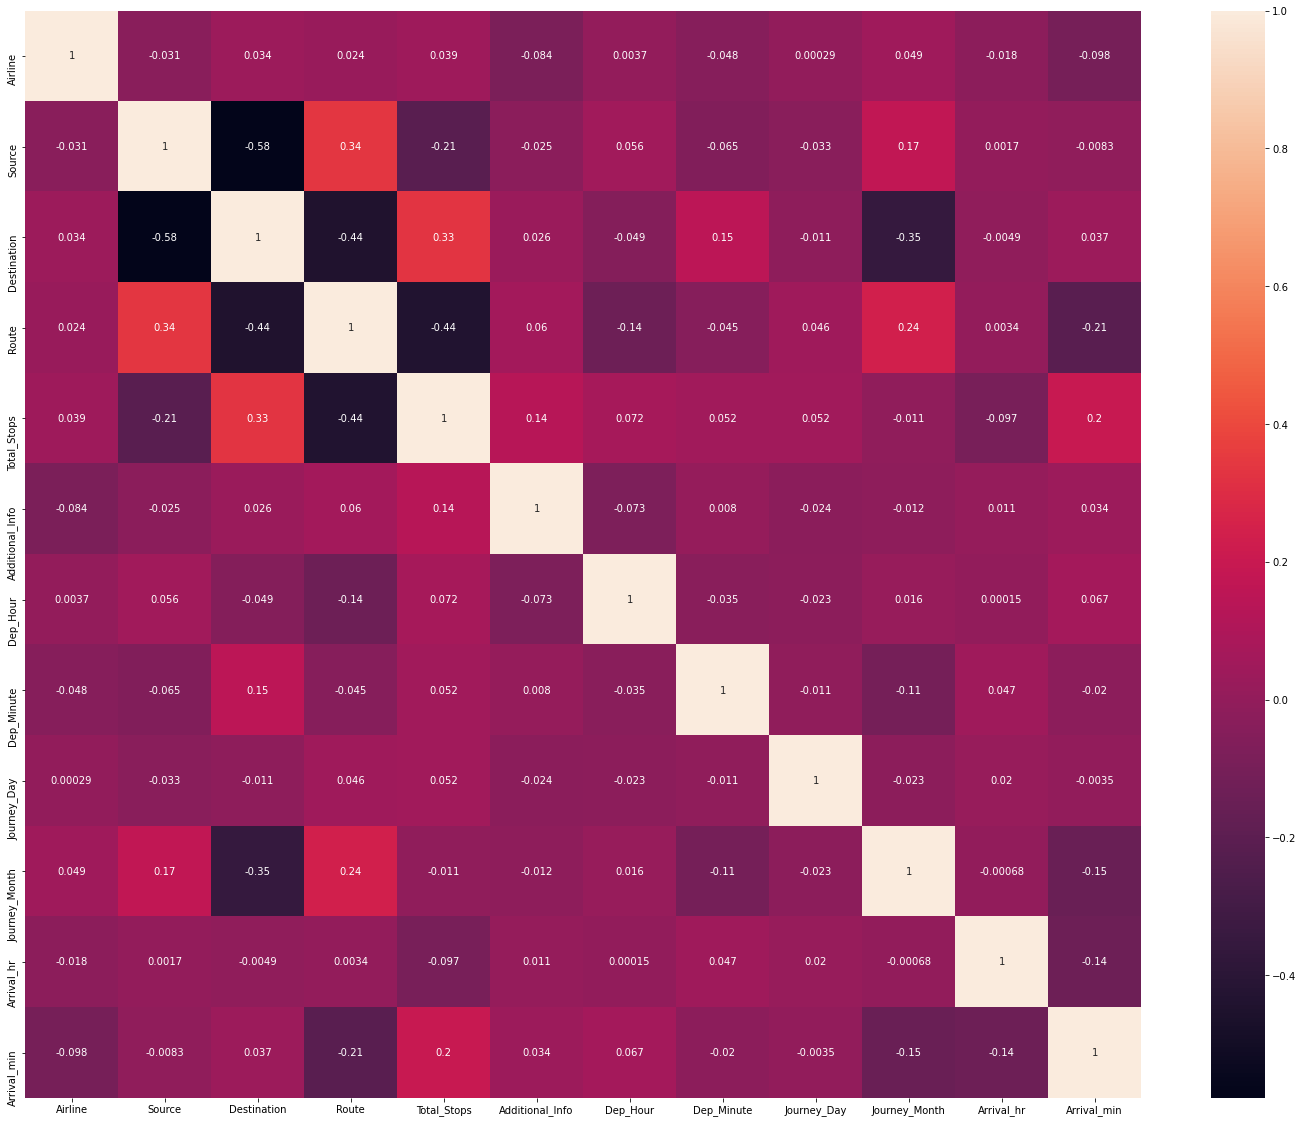

In [52]:
plt.figure(figsize=[25,20])
sns.heatmap(df_test.corr(),annot=True)

# statistical summary

In [53]:
df.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_hr,Arrival_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.822896,1.458111,7.393054,9087.064121,12.490686,24.411214,13.508378,4.708602,13.348778,24.690630
std,2.352155,1.177221,1.474782,36.728405,1.806290,1.214211,4611.359167,5.748650,18.767980,8.479277,1.164357,6.859125,16.506036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,0.000000,8.000000,5277.000000,8.000000,5.000000,6.000000,3.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,73.000000,0.000000,8.000000,8372.000000,11.000000,25.000000,12.000000,5.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,104.000000,4.000000,8.000000,12373.000000,18.000000,40.000000,21.000000,6.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,127.000000,4.000000,9.000000,79512.000000,23.000000,55.000000,27.000000,6.000000,23.000000,55.000000


In [54]:
df_test.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_hr,Arrival_min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,1.961438,1.432797,54.356421,1.422688,4.634594,12.603519,24.891426,12.915762,4.718458,13.585174,24.558218
std,2.295657,1.184328,1.467971,27.128993,1.795728,0.760781,5.686673,19.086522,8.260824,1.170851,7.040396,16.775436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,33.000000,0.000000,5.000000,8.000000,5.000000,6.000000,3.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,51.000000,0.000000,5.000000,12.000000,25.000000,12.000000,5.000000,15.000000,25.000000
75%,6.000000,3.000000,2.000000,76.000000,4.000000,5.000000,18.000000,45.000000,21.000000,6.000000,19.000000,35.000000
max,10.000000,4.000000,5.000000,99.000000,4.000000,5.000000,23.000000,55.000000,27.000000,6.000000,23.000000,55.000000


In [55]:
x=df.drop(columns="Price")
y=df["Price"]

In [56]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

In [57]:

df_test_scaled=sc.fit_transform(df_test)
df_test=pd.DataFrame(df_test_scaled, columns=x.columns)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

now use various model to get accuracy

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(max_depth=2, random_state=0)
model=rf.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.41554469620945067
cv_score= [0.42899077 0.44103968 0.45190886 0.47121256 0.44043377]


In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
neigh = KNeighborsRegressor(n_neighbors=5)
model = neigh.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.7442164739452217
cv_score= [0.77280827 0.7668638  0.75870659 0.79243703 0.75960146]


In [64]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
gbr = GradientBoostingRegressor(random_state=0)
model=gbr.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.8396987139121381
cv_score= [0.81019524 0.82558204 0.81645868 0.83549719 0.83548285]


In [63]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
abr = AdaBoostRegressor(random_state=0)
model=abr.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.5040200881501687
cv_score= [0.25231321 0.43755287 0.31858754 0.41433142 0.50351423]


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_test, y_pred)
print("r2=",r2)
score=cross_val_score(model,x,y,cv=5,scoring="r2")
print("cv_score=",score)

r2= 0.3663195690503662
cv_score= [0.37573229 0.37971639 0.3833546  0.37244201 0.34996407]


GradientBoostingRegressor has high accuracy and we will hypertuned this model

In [76]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(10,200,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='r2', cv=5)
gsearch1.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'n_estimators': range(10, 200, 10)}, scoring='r2')

In [77]:
gsearch1.best_estimator_,gsearch1.best_params_, gsearch1.best_score_

(GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                           min_samples_split=500, n_estimators=190,
                           random_state=10, subsample=0.8),
 {'n_estimators': 190},
 0.8296781474604995)

In [78]:
 gsearch1.score(x_test,y_test)

0.8163086184081643

# conclusion


So our final accuracy is 81% and GradientBoostingRegressor is our best model